In [33]:
'''Steps are
1.Download the Dataset
2.Install Required Libraries
3.Load and Explore the Data
4.Perform Sentiment Analysis
5.Visualize Sentiment Distribution
6.Explore Sentiment by Entity
7.Word Cloud for Positive and Negative Sentiments
 '''

'Steps are\n1.Download the Dataset\n2.Install Required Libraries\n3.Load and Explore the Data\n4.Perform Sentiment Analysis\n5.Visualize Sentiment Distribution\n6.Explore Sentiment by Entity\n7.Word Cloud for Positive and Negative Sentiments\n '

In [41]:
'''step 1,2,3 '''
import pandas as pd

# Load the training dataset
training_file_path = "/content/task_4/twitter_training.csv"
df_training = pd.read_csv(training_file_path)
df=df_training


# Load the validation dataset
validation_file_path = "/content/task_4/twitter_validation.csv"
df_validation = pd.read_csv(validation_file_path)

# Display basic information about the training dataset
print("Training Dataset Information:")
print(df_training.info())

# Display the first few rows of the training dataset
print("\nFirst Few Rows of the Training Dataset:")
print(df_training.head())

# Display basic information about the validation dataset
print("\nValidation Dataset Information:")
print(df_validation.info())

# Display the first few rows of the validation dataset
print("\nFirst Few Rows of the Validation Dataset:")
print(df_validation.head())


Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

First Few Rows of the Training Dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I 

In [55]:
from textblob import TextBlob

# Perform sentiment analysis on the training dataset
df_training['Positive'] = df_training.iloc[:, 3].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Perform sentiment analysis on the validation dataset
df_validation['Negative'] = df_validation.iloc[:, 3].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [56]:
print(df_training.columns)
print(df_validation.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣',
       'Negative'],
      dtype='object')


In [61]:
from textblob import TextBlob

# Perform sentiment analysis on the training dataset
df_training['Positive'] = df_training.iloc[:, 3].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Perform sentiment analysis on the validation dataset
df_validation['Negative'] = df_validation.iloc[:, 3].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

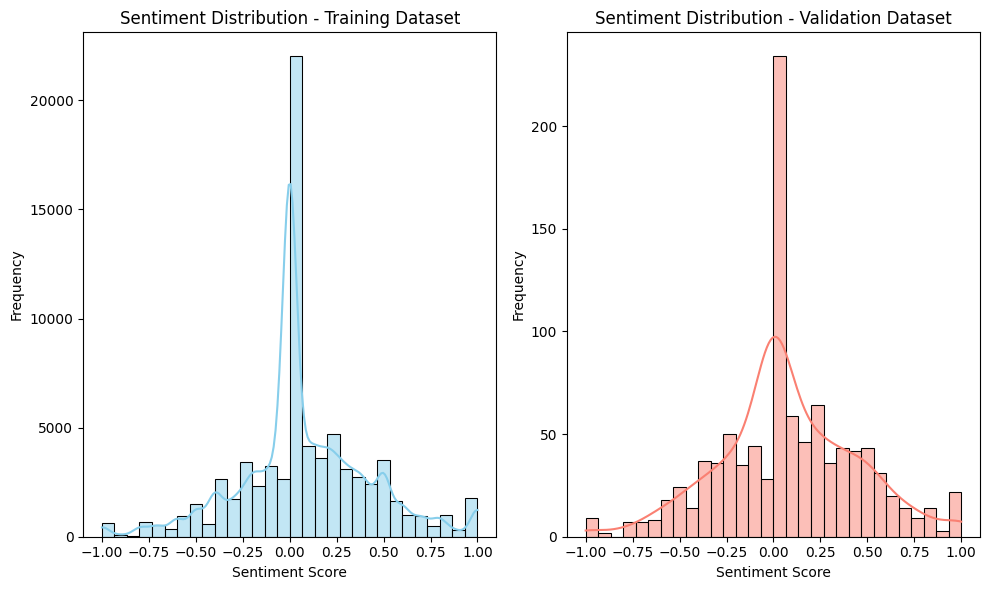

In [68]:
# Visualize Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Training Dataset
plt.subplot(1, 2, 1)
sns.histplot(df_training['Positive'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Distribution - Training Dataset')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Validation Dataset
plt.subplot(1, 2, 2)
sns.histplot(df_validation['Negative'], bins=30, kde=True, color='salmon')
plt.title('Sentiment Distribution - Validation Dataset')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

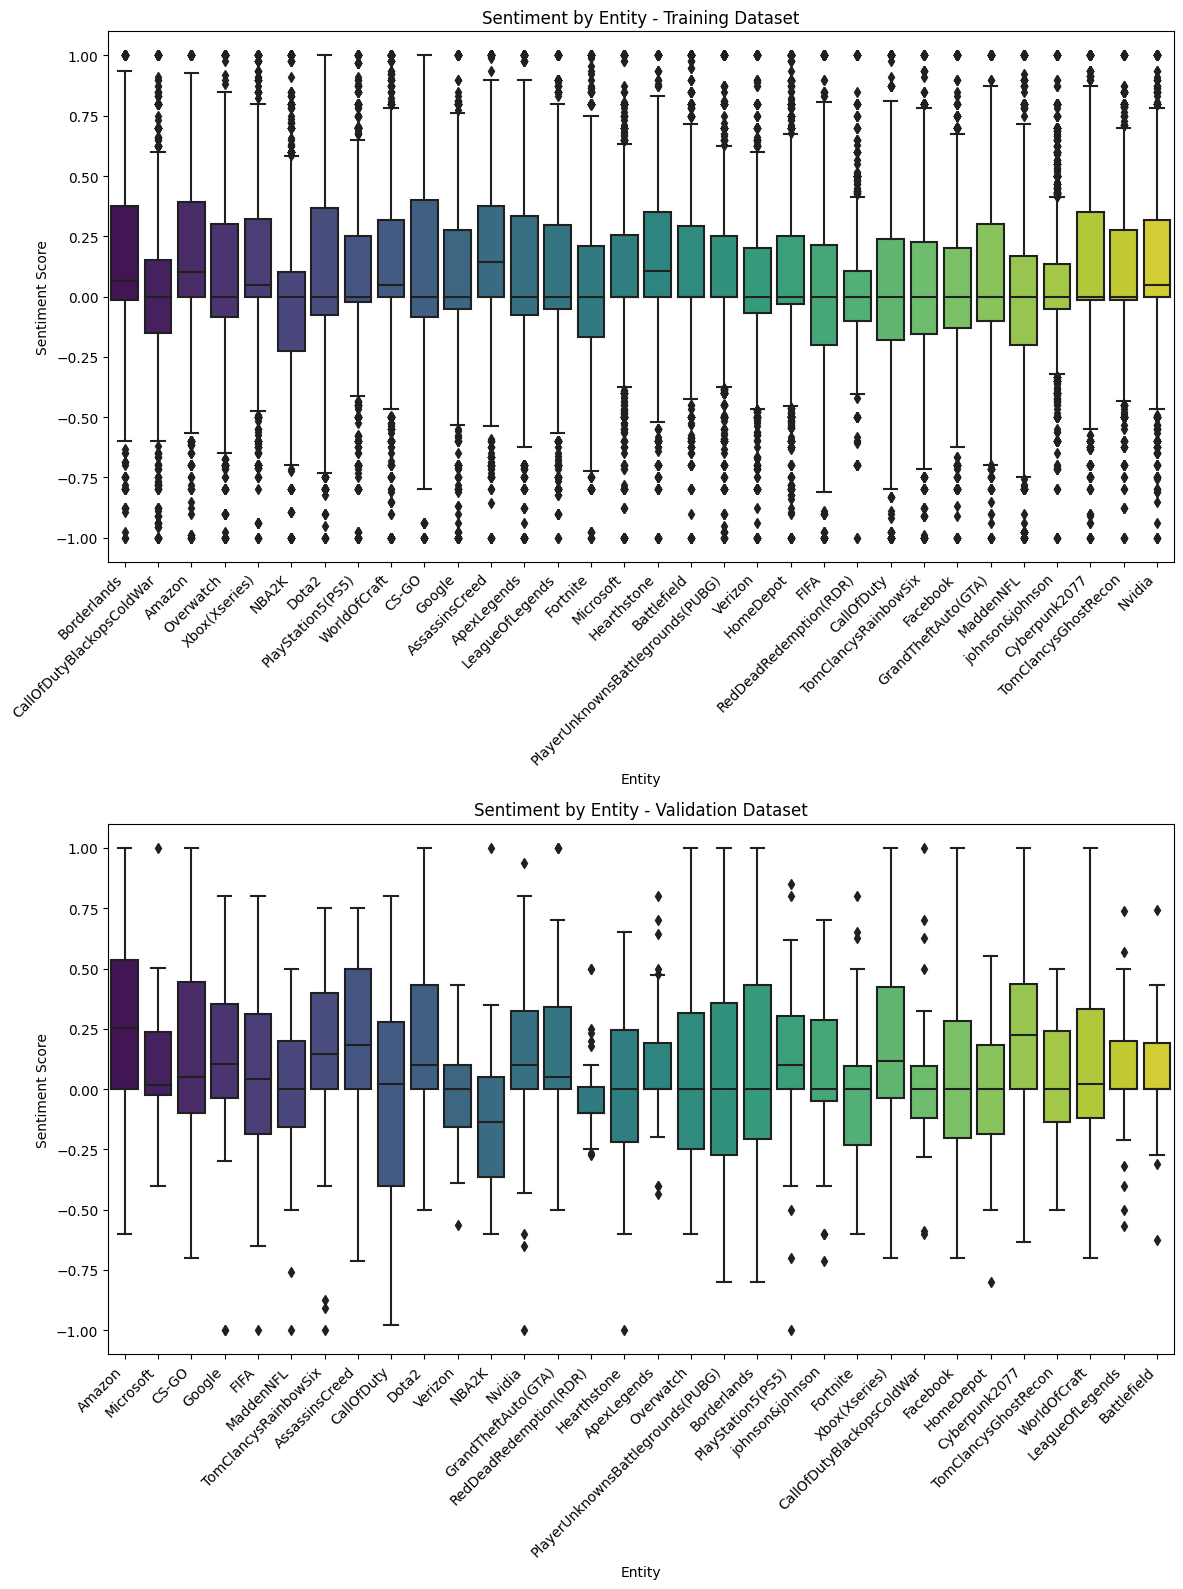

In [71]:
# Explore Sentiment by Entity
plt.figure(figsize=(12, 16))  # Increase the height to accommodate two rows

# Training Dataset
plt.subplot(2, 1, 1)  # Two rows, one column, select the first subplot
sns.boxplot(x='Borderlands', y='Positive', data=df_training, palette='viridis')
plt.title('Sentiment by Entity - Training Dataset')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')

# Validation Dataset
plt.subplot(2, 1, 2)  # Two rows, one column, select the second subplot
sns.boxplot(x='Facebook', y='Negative', data=df_validation, palette='viridis')
plt.title('Sentiment by Entity - Validation Dataset')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [92]:
print("Training Dataset Columns:", df_training.columns)
print("Validation Dataset Columns:", df_validation.columns)


Training Dataset Columns: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Validation Dataset Columns: Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣',
       'Negative'],
      dtype='object')


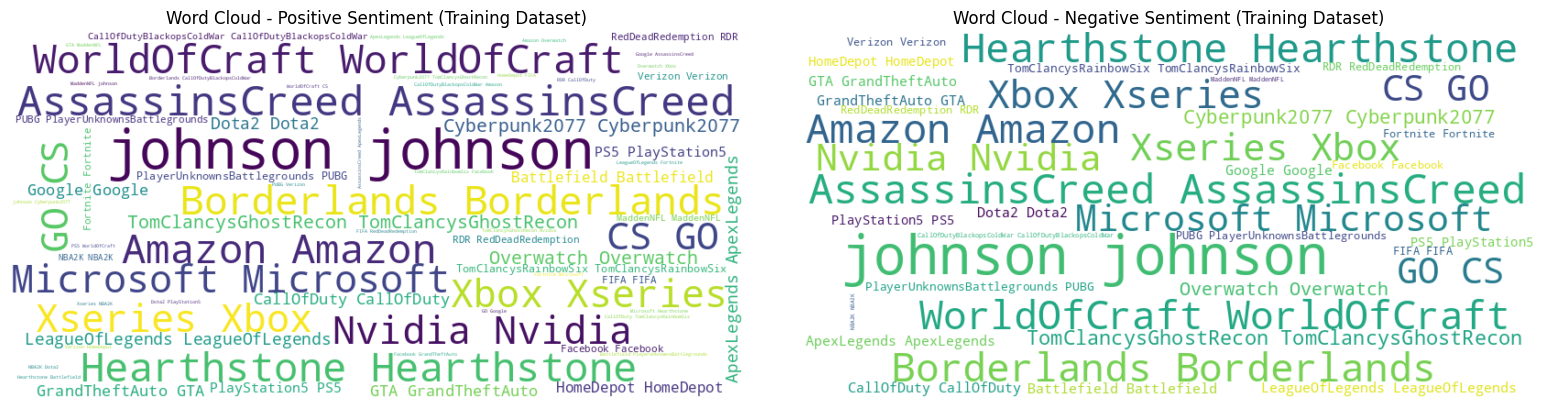

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check if the 'Positive' and 'Negative' columns exist in the DataFrames
if 'Positive' in df_training.columns and 'Negative' in df_training.columns:


    # Positive sentiment word cloud - Training Dataset
    positive_tweets_training = df_training[df_training['Positive'] > 0]['Borderlands'].str.cat(sep=' ')
    wordcloud_positive_training = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets_training)



    # Negative sentiment word cloud - Training Dataset
    negative_tweets_training = df_training[df_training['Negative'] < 0]['Borderlands'].str.cat(sep=' ')
    wordcloud_negative_training = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets_training)

    # Plot the word clouds
    plt.figure(figsize=(16, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(wordcloud_positive_training, interpolation='bilinear')
    plt.title('Word Cloud - Positive Sentiment (Training Dataset)')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(wordcloud_negative_training, interpolation='bilinear')
    plt.title('Word Cloud - Negative Sentiment (Training Dataset)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Columns 'Positive' and 'Negative' not found in the training DataFrame.")


                                    Positive Sentiment Cloud                                                                                      Negative Sentiment Cloud